# Multi-Liniar-regression: 4_29_2020 Lesson 73 

In [1]:
#Now, we'll keep moving along with using scikit learn to do a multi variable regression. 
#This will be a similar apporach to the above example, 
#but sci kit learn will be able to take into account more than just a single data variable effecting the target!

In [2]:
import numpy as np
from numpy import linalg
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.datasets import load_boston


import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
'''
In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared",
is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose
is either the prediction of future outcomes or the testing of hypotheses, 
on the basis of other related information. 
It provides a measure of how well observed outcomes are replicated by the model, 
based on the proportion of total variation of outcomes explained by the model.[


'''

'\nIn statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared",\nis the proportion of the variance in the dependent variable that is predictable from the independent variable(s).\n\nIt is a statistic used in the context of statistical models whose main purpose\nis either the prediction of future outcomes or the testing of hypotheses, \non the basis of other related information. \nIt provides a measure of how well observed outcomes are replicated by the model, \nbased on the proportion of total variation of outcomes explained by the model.[\n\n\n'

In [4]:
boston = load_boston()
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target
# print(boston_df.head())




# Create a LinearRegression Class object
lreg = LinearRegression()  #this comes form sklearn.linear_model module
X_multi = boston_df.drop('Price',1)
y_target = boston_df.Price
print(X_multi.head())

'''
Estimator by definition implements: 
1. lreg.fit() which fits a linear model

2. lreg.predict() which is used to predict Y using the linear model with estimated coefficients

3. lreg.score() which returns the coefficient of determination (R^2).
 or score is A measure of how well observed outcomes are replicated by the model
     - Perfectly liniear fit would give a score of 1
     - 

'''

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


'\nEstimator by definition implements: \n1. lreg.fit() which fits a linear model\n\n2. lreg.predict() which is used to predict Y using the linear model with estimated coefficients\n\n3. lreg.score() which returns the coefficient of determination (R^2).\n or score is A measure of how well observed outcomes are replicated by the model\n     - Perfectly liniear fit would give a score of 1\n     - \n\n'

In [5]:
lreg.fit(X_multi, y_target)
print('The estimate intercept coefficient is this btw is the b of y=mx+b : ' + str(lreg.intercept_))
print('The number of coefficient used was : ' + str(len(lreg.coef_)))

The estimate intercept coefficient is this btw is the b of y=mx+b : 36.45948838508982
The number of coefficient used was : 13


In [6]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.colums = ['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

c:\users\dicei\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,0,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [7]:
# the highest Coefficient estimate is the RM, with Price, so now you can isolate that to do regression. 

# Lesson 75 Training and validation (of data) 

In [8]:
# split the data to mostly training and some testing. using 

In [9]:
X = np.vstack(boston_df.RM) 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)   #Crossvalidation module is depricated 3:23
'''
output of train_test_split() => 1. x_training data, 2. y_training data, 3. x_testing data and 4. y_testing data

'''
#x_train
#x_test
#y_train
#y_test
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(379, 1) (127, 1) (379,) (127,)


In [10]:
lreg = LinearRegression()

In [11]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:


pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)

# Now we will fit the x_train and calcuate the MSE using y_train

MSE = np.mean((y_train - pred_train)**2)
MSE = round(MSE,3)
MSE_test = np.mean((y_test - pred_test)**2)
MSE_test = round(MSE_test,3)
print('MSE:' + str(MSE))

# Fit a model with x_train and calculate MSE with x_test and y_test 
print('MSE_test: ' + str(MSE_test))

MSE:42.589
MSE_test: 46.785


# Residual = Observed Value - Predicted value

In [ ]:
'''
Minimize: 
LinearRegression fits a linear model with coefficients
to minimize the residual sum of squares between the observed targets in the dataset, 
and the targets(predicted value) predicted by the linear approximation. Mathematically it solves a problem of the form:
https://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis 
'''

Text(0.5, 1.0, 'Residual Plot')

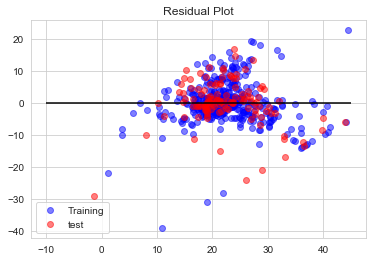

In [17]:
residual_v1 = (pred_train - y_train)
residual_v2 = (pred_test - y_test)

train = plt.scatter(pred_train,residual_v1,c='b',alpha = 0.5)
test = plt.scatter(pred_test,residual_v2, c='r', alpha = 0.5)
plt.hlines(y = 0, xmin = -10, xmax = 45)
plt.legend((train,test),('Training', 'test'),loc = 'lower left')
plt.title('Residual Plot')